In [55]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [57]:
yf.pdr_override()
df = pdr.get_data_yahoo("ES=F", start="2016-01-01", end="2023-03-31")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()

[*********************100%***********************]  1 of 1 completed


In [58]:
df.to_csv("Price_SP500.csv")

In [48]:
df=pd.read_csv('Price_SP500.csv')

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2016,2037.75,2043.50,1980.25,2009.00,2009.00,2216549.0
1,1/5/2016,2009.00,2017.00,1992.25,2011.75,2011.75,1688974.0
2,1/6/2016,2010.75,2013.25,1970.50,1986.00,1986.00,2237518.0
3,1/7/2016,1987.75,1991.00,1928.50,1933.00,1933.00,2969295.0
4,1/8/2016,1936.50,1964.75,1910.00,1911.50,1911.50,2694404.0


In [50]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1820,3/27/2023,4008.0,4034.25,3997.50,4007.25,4007.25,1304572.0
1821,3/28/2023,4013.5,4023.75,3980.75,4001.50,4001.50,1224495.0
1822,3/29/2023,4006.5,4061.25,4006.00,4057.50,4057.50,1389352.0
1823,3/30/2023,4058.0,4087.75,4052.50,4080.00,4080.00,1389352.0
1824,3/31/2023,4106.0,NaN,NaN,NaN,NaN,NaN


In [51]:
df.shape

(1825, 7)

In [52]:
df1=df.reset_index()['Open']

In [53]:
df1

0       2037.75
1       2009.00
2       2010.75
3       1987.75
4       1936.50
         ...   
1820    4008.00
1821    4013.50
1822    4006.50
1823    4058.00
1824    4106.00
Name: Open, Length: 1825, dtype: float64

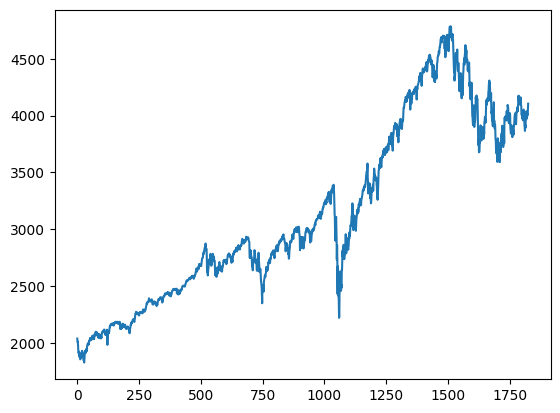

In [54]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [55]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [56]:
import numpy as np

In [57]:
df1

0       2037.75
1       2009.00
2       2010.75
3       1987.75
4       1936.50
         ...   
1820    4008.00
1821    4013.50
1822    4006.50
1823    4058.00
1824    4106.00
Name: Open, Length: 1825, dtype: float64

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [59]:
df1

array([[0.07116295],
       [0.06144354],
       [0.06203516],
       ...,
       [0.7367309 ],
       [0.75414131],
       [0.77036849]])

In [60]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [61]:
training_size,test_size

(1186, 639)

In [62]:
train_data

array([[0.07116295],
       [0.06144354],
       [0.06203516],
       ...,
       [0.52924273],
       [0.51673428],
       [0.50278905]])

In [63]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [64]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [65]:
print(X_train.shape), print(y_train.shape)

(1085, 100)
(1085,)


(None, None)

In [66]:
print(X_test.shape), print(ytest.shape)

(538, 100)
(538,)


(None, None)

In [67]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [68]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [69]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 12s 325ms/step - loss: 0.0215 - val_loss: 0.1014
Epoch 2/100
17/17 [==============================] - 4s 251ms/step - loss: 0.0035 - val_loss: 0.0504
Epoch 3/100
17/17 [==============================] - 3s 188ms/step - loss: 0.0017 - val_loss: 0.0116
Epoch 4/100
17/17 [==============================] - 4s 224ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 4s 207ms/step - loss: 9.9683e-04 - val_loss: 0.0035
Epoch 6/100
17/17 [==============================] - 4s 245ms/step - loss: 9.6067e-04 - val_loss: 0.0023
Epoch 7/100
17/17 [==============================] - 4s 238ms/step - loss: 9.8080e-04 - val_loss: 0.0045
Epoch 8/100
17/17 [==============================] - 3s 189ms/step - loss: 9.0032e-04 - val_loss: 0.0022
Epoch 9/100
17/17 [==============================] - 4s 239ms/step - loss: 8.7227e-04 - val_loss: 0.0043
Epoch 10/100
17/17 [==============================] - 3s 204ms/step - 

In [73]:
import tensorflow as tf

In [74]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 40ms/step


In [75]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [76]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2720.0794468348076

In [77]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4122.575732351302

In [78]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

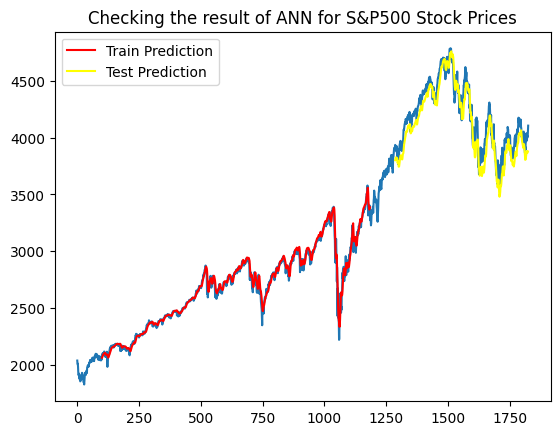

In [79]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for S&P500 Stock Prices")
plt.show()

In [80]:
len(test_data)

639

In [81]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 298)

In [82]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [83]:
temp_input

[0.8512508451656524,
 0.8521805273833671,
 0.8777045300878972,
 0.9012846517917512,
 0.9211460446247464,
 0.9190331304935766,
 0.9096517917511833,
 0.902552400270453,
 0.89815753887762,
 0.9099898580121704,
 0.9313725490196079,
 0.9017072346179851,
 0.8737322515212982,
 0.8675625422582827,
 0.8896213657876944,
 0.8914807302231238,
 0.8612237998647734,
 0.8441514536849222,
 0.8395875591615956,
 0.8073867478025694,
 0.8247126436781609,
 0.8357843137254901,
 0.8587728194726165,
 0.8389114266396214,
 0.8608857336037863,
 0.8584347532116294,
 0.8389114266396214,
 0.7975828262339417,
 0.7862576064908722,
 0.8288539553752534,
 0.8219235970250169,
 0.8075557809330629,
 0.7954699121027722,
 0.8215855307640296,
 0.859787018255578,
 0.8673935091277891,
 0.8900439486139282,
 0.88894523326572,
 0.9049188640973631,
 0.8864097363083163,
 0.9090601757944556,
 0.9154834347532117,
 0.9273157538877619,
 0.9445571331981069,
 0.9370351588911425,
 0.9174273157538877,
 0.916497633536173,
 0.9293441514536849,

In [84]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=297
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.85218053 0.87770453 0.90128465 0.92114604 0.91903313 0.90965179
 0.9025524  0.89815754 0.90998986 0.93137255 0.90170723 0.87373225
 0.86756254 0.88962137 0.89148073 0.8612238  0.84415145 0.83958756
 0.80738675 0.82471264 0.83578431 0.85877282 0.83891143 0.86088573
 0.85843475 0.83891143 0.79758283 0.78625761 0.82885396 0.8219236
 0.80755578 0.79546991 0.82158553 0.85978702 0.86739351 0.89004395
 0.88894523 0.90491886 0.88640974 0.90906018 0.91548343 0.92731575
 0.94455713 0.93703516 0.91742732 0.91649763 0.92934415 0.91244084
 0.89384719 0.90179175 0.89976335 0.8734787  0.86866126 0.88277552
 0.86637931 0.86942191 0.88362069 0.89274848 0.86494253 0.82209263
 0.83392495 0.78507437 0.80654158 0.81702164 0.78321501 0.78372211
 0.79242732 0.83248817 0.78406018 0.76402975 0.73225152 0.73132184
 0.71416498 0.70622042 0.74298513 0.7352096  0.76538201 0.70630494
 0.70089588 0.70427654 0.71822177 0.71763016 0.72515213 0.75059162
 0.79014537 0.78135565 0.76757945 0.79462475 0.7718

2 day output [[0.6860974]]
3 day input [0.92114604 0.91903313 0.90965179 0.9025524  0.89815754 0.90998986
 0.93137255 0.90170723 0.87373225 0.86756254 0.88962137 0.89148073
 0.8612238  0.84415145 0.83958756 0.80738675 0.82471264 0.83578431
 0.85877282 0.83891143 0.86088573 0.85843475 0.83891143 0.79758283
 0.78625761 0.82885396 0.8219236  0.80755578 0.79546991 0.82158553
 0.85978702 0.86739351 0.89004395 0.88894523 0.90491886 0.88640974
 0.90906018 0.91548343 0.92731575 0.94455713 0.93703516 0.91742732
 0.91649763 0.92934415 0.91244084 0.89384719 0.90179175 0.89976335
 0.8734787  0.86866126 0.88277552 0.86637931 0.86942191 0.88362069
 0.89274848 0.86494253 0.82209263 0.83392495 0.78507437 0.80654158
 0.81702164 0.78321501 0.78372211 0.79242732 0.83248817 0.78406018
 0.76402975 0.73225152 0.73132184 0.71416498 0.70622042 0.74298513
 0.7352096  0.76538201 0.70630494 0.70089588 0.70427654 0.71822177
 0.71763016 0.72515213 0.75059162 0.79014537 0.78135565 0.76757945
 0.79462475 0.77188979 

6 day output [[0.63978505]]
7 day input [0.89815754 0.90998986 0.93137255 0.90170723 0.87373225 0.86756254
 0.88962137 0.89148073 0.8612238  0.84415145 0.83958756 0.80738675
 0.82471264 0.83578431 0.85877282 0.83891143 0.86088573 0.85843475
 0.83891143 0.79758283 0.78625761 0.82885396 0.8219236  0.80755578
 0.79546991 0.82158553 0.85978702 0.86739351 0.89004395 0.88894523
 0.90491886 0.88640974 0.90906018 0.91548343 0.92731575 0.94455713
 0.93703516 0.91742732 0.91649763 0.92934415 0.91244084 0.89384719
 0.90179175 0.89976335 0.8734787  0.86866126 0.88277552 0.86637931
 0.86942191 0.88362069 0.89274848 0.86494253 0.82209263 0.83392495
 0.78507437 0.80654158 0.81702164 0.78321501 0.78372211 0.79242732
 0.83248817 0.78406018 0.76402975 0.73225152 0.73132184 0.71416498
 0.70622042 0.74298513 0.7352096  0.76538201 0.70630494 0.70089588
 0.70427654 0.71822177 0.71763016 0.72515213 0.75059162 0.79014537
 0.78135565 0.76757945 0.79462475 0.77188979 0.77577755 0.78549696
 0.77374915 0.74306964

10 day output [[0.60568184]]
11 day input [0.87373225 0.86756254 0.88962137 0.89148073 0.8612238  0.84415145
 0.83958756 0.80738675 0.82471264 0.83578431 0.85877282 0.83891143
 0.86088573 0.85843475 0.83891143 0.79758283 0.78625761 0.82885396
 0.8219236  0.80755578 0.79546991 0.82158553 0.85978702 0.86739351
 0.89004395 0.88894523 0.90491886 0.88640974 0.90906018 0.91548343
 0.92731575 0.94455713 0.93703516 0.91742732 0.91649763 0.92934415
 0.91244084 0.89384719 0.90179175 0.89976335 0.8734787  0.86866126
 0.88277552 0.86637931 0.86942191 0.88362069 0.89274848 0.86494253
 0.82209263 0.83392495 0.78507437 0.80654158 0.81702164 0.78321501
 0.78372211 0.79242732 0.83248817 0.78406018 0.76402975 0.73225152
 0.73132184 0.71416498 0.70622042 0.74298513 0.7352096  0.76538201
 0.70630494 0.70089588 0.70427654 0.71822177 0.71763016 0.72515213
 0.75059162 0.79014537 0.78135565 0.76757945 0.79462475 0.77188979
 0.77577755 0.78549696 0.77374915 0.74306964 0.6908384  0.65280595
 0.64663624 0.664976

13 day output [[0.5708823]]
14 day input [0.89148073 0.8612238  0.84415145 0.83958756 0.80738675 0.82471264
 0.83578431 0.85877282 0.83891143 0.86088573 0.85843475 0.83891143
 0.79758283 0.78625761 0.82885396 0.8219236  0.80755578 0.79546991
 0.82158553 0.85978702 0.86739351 0.89004395 0.88894523 0.90491886
 0.88640974 0.90906018 0.91548343 0.92731575 0.94455713 0.93703516
 0.91742732 0.91649763 0.92934415 0.91244084 0.89384719 0.90179175
 0.89976335 0.8734787  0.86866126 0.88277552 0.86637931 0.86942191
 0.88362069 0.89274848 0.86494253 0.82209263 0.83392495 0.78507437
 0.80654158 0.81702164 0.78321501 0.78372211 0.79242732 0.83248817
 0.78406018 0.76402975 0.73225152 0.73132184 0.71416498 0.70622042
 0.74298513 0.7352096  0.76538201 0.70630494 0.70089588 0.70427654
 0.71822177 0.71763016 0.72515213 0.75059162 0.79014537 0.78135565
 0.76757945 0.79462475 0.77188979 0.77577755 0.78549696 0.77374915
 0.74306964 0.6908384  0.65280595 0.64663624 0.66497634 0.6255071
 0.62770453 0.62770453

16 day output [[0.5289086]]
17 day input [0.83958756 0.80738675 0.82471264 0.83578431 0.85877282 0.83891143
 0.86088573 0.85843475 0.83891143 0.79758283 0.78625761 0.82885396
 0.8219236  0.80755578 0.79546991 0.82158553 0.85978702 0.86739351
 0.89004395 0.88894523 0.90491886 0.88640974 0.90906018 0.91548343
 0.92731575 0.94455713 0.93703516 0.91742732 0.91649763 0.92934415
 0.91244084 0.89384719 0.90179175 0.89976335 0.8734787  0.86866126
 0.88277552 0.86637931 0.86942191 0.88362069 0.89274848 0.86494253
 0.82209263 0.83392495 0.78507437 0.80654158 0.81702164 0.78321501
 0.78372211 0.79242732 0.83248817 0.78406018 0.76402975 0.73225152
 0.73132184 0.71416498 0.70622042 0.74298513 0.7352096  0.76538201
 0.70630494 0.70089588 0.70427654 0.71822177 0.71763016 0.72515213
 0.75059162 0.79014537 0.78135565 0.76757945 0.79462475 0.77188979
 0.77577755 0.78549696 0.77374915 0.74306964 0.6908384  0.65280595
 0.64663624 0.66497634 0.6255071  0.62770453 0.62770453 0.65551048
 0.65382015 0.6619337

21 day output [[0.44799137]]
22 day input [0.83891143 0.86088573 0.85843475 0.83891143 0.79758283 0.78625761
 0.82885396 0.8219236  0.80755578 0.79546991 0.82158553 0.85978702
 0.86739351 0.89004395 0.88894523 0.90491886 0.88640974 0.90906018
 0.91548343 0.92731575 0.94455713 0.93703516 0.91742732 0.91649763
 0.92934415 0.91244084 0.89384719 0.90179175 0.89976335 0.8734787
 0.86866126 0.88277552 0.86637931 0.86942191 0.88362069 0.89274848
 0.86494253 0.82209263 0.83392495 0.78507437 0.80654158 0.81702164
 0.78321501 0.78372211 0.79242732 0.83248817 0.78406018 0.76402975
 0.73225152 0.73132184 0.71416498 0.70622042 0.74298513 0.7352096
 0.76538201 0.70630494 0.70089588 0.70427654 0.71822177 0.71763016
 0.72515213 0.75059162 0.79014537 0.78135565 0.76757945 0.79462475
 0.77188979 0.77577755 0.78549696 0.77374915 0.74306964 0.6908384
 0.65280595 0.64663624 0.66497634 0.6255071  0.62770453 0.62770453
 0.65551048 0.65382015 0.66193374 0.70579784 0.70453009 0.67647059
 0.67461122 0.66083502 

24 day output [[0.3881561]]
25 day input [0.83891143 0.79758283 0.78625761 0.82885396 0.8219236  0.80755578
 0.79546991 0.82158553 0.85978702 0.86739351 0.89004395 0.88894523
 0.90491886 0.88640974 0.90906018 0.91548343 0.92731575 0.94455713
 0.93703516 0.91742732 0.91649763 0.92934415 0.91244084 0.89384719
 0.90179175 0.89976335 0.8734787  0.86866126 0.88277552 0.86637931
 0.86942191 0.88362069 0.89274848 0.86494253 0.82209263 0.83392495
 0.78507437 0.80654158 0.81702164 0.78321501 0.78372211 0.79242732
 0.83248817 0.78406018 0.76402975 0.73225152 0.73132184 0.71416498
 0.70622042 0.74298513 0.7352096  0.76538201 0.70630494 0.70089588
 0.70427654 0.71822177 0.71763016 0.72515213 0.75059162 0.79014537
 0.78135565 0.76757945 0.79462475 0.77188979 0.77577755 0.78549696
 0.77374915 0.74306964 0.6908384  0.65280595 0.64663624 0.66497634
 0.6255071  0.62770453 0.62770453 0.65551048 0.65382015 0.66193374
 0.70579784 0.70453009 0.67647059 0.67461122 0.66083502 0.6765551
 0.67976673 0.68509128

27 day output [[0.30878228]]
28 day input [0.82885396 0.8219236  0.80755578 0.79546991 0.82158553 0.85978702
 0.86739351 0.89004395 0.88894523 0.90491886 0.88640974 0.90906018
 0.91548343 0.92731575 0.94455713 0.93703516 0.91742732 0.91649763
 0.92934415 0.91244084 0.89384719 0.90179175 0.89976335 0.8734787
 0.86866126 0.88277552 0.86637931 0.86942191 0.88362069 0.89274848
 0.86494253 0.82209263 0.83392495 0.78507437 0.80654158 0.81702164
 0.78321501 0.78372211 0.79242732 0.83248817 0.78406018 0.76402975
 0.73225152 0.73132184 0.71416498 0.70622042 0.74298513 0.7352096
 0.76538201 0.70630494 0.70089588 0.70427654 0.71822177 0.71763016
 0.72515213 0.75059162 0.79014537 0.78135565 0.76757945 0.79462475
 0.77188979 0.77577755 0.78549696 0.77374915 0.74306964 0.6908384
 0.65280595 0.64663624 0.66497634 0.6255071  0.62770453 0.62770453
 0.65551048 0.65382015 0.66193374 0.70579784 0.70453009 0.67647059
 0.67461122 0.66083502 0.6765551  0.67976673 0.68509128 0.69971264
 0.70072684 0.68788032 

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
import matplotlib.pyplot as plt

In [87]:
len(df1)

1825

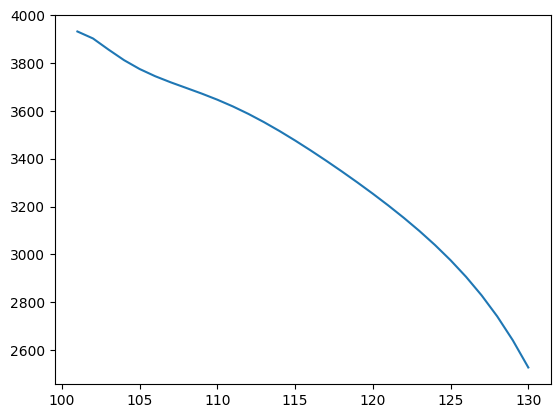

In [88]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [89]:
df1

array([[0.07116295],
       [0.06144354],
       [0.06203516],
       ...,
       [0.7367309 ],
       [0.75414131],
       [0.77036849]])

In [90]:
scaler.inverse_transform(lst_output)

array([[3932.43221915],
       [3903.29831302],
       [3856.72606039],
       [3812.44778419],
       [3775.4871006 ],
       [3745.32953548],
       [3719.73418188],
       [3696.18438315],
       [3672.4901861 ],
       [3647.03958344],
       [3618.85687268],
       [3587.53988945],
       [3553.12371957],
       [3515.91990376],
       [3476.36022651],
       [3434.86607003],
       [3391.7616694 ],
       [3347.22333515],
       [3301.2563566 ],
       [3253.70223057],
       [3204.24280471],
       [3152.40847588],
       [3097.57025623],
       [3038.91923302],
       [2975.415703  ],
       [2905.72852159],
       [2828.16096431],
       [2740.62798274],
       [2640.79936862],
       [2526.66575482]])

In [91]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

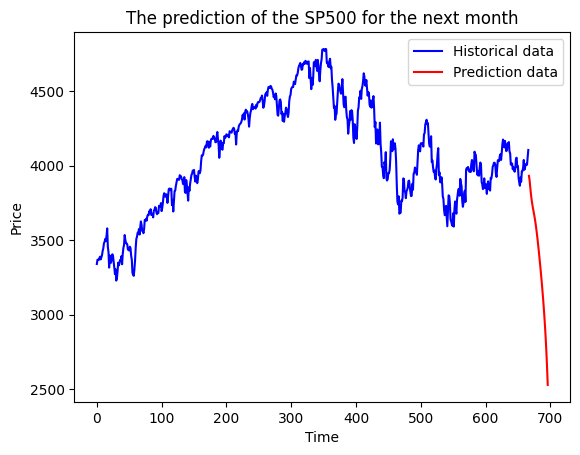

In [92]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("The prediction of the SP500 for the next month")

# show the plot
plt.show()